# 3 - Visualización de datos sobre dataset de Cálidad de Vino

#### En este notebook se presentarán diferentes gráficos utilizados en un análisis exploratorio. En este caso se trabajará sobre un dataset público que posee datos sobre diferentes vinos de la empresa portugesa Vinho Verde.
#### Entre los datos podremos observar los asociados a pruebas fisioquímicas, como por ejemplo la cantidad de alcohol el PH y la densidad y un dato sensorial, la calidad del vino.

# Importación de las librerías a utilizar

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Carga y union de datasets
#### Los datos de los vinos provienen de dos archivos distintos (del tipo csv) que serán unidos en un dataframe "wines"

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

# Usando el método head(), podemos ver los primeros registros del dataframe

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


### Entendimiento del Negocio/Problema

El vino es una bebida alcohólica hecha a partir de uvas que se fermenta sin la adición de azúcares, ácidos, enzimas, agua, u otros nutrientes.

El vino tinto se elabora con uvas rojas y negras oscuras. El color varía normalmente de varios tonos de rojo, azul y violeta. Esto se produce con uvas enteras incluyendo la piel, que se suma al color y sabor de vino tinto.


El vino blanco se elabora con uvas blancas sin piel o semillas. El color es generalmente de color amarillo pajizo, amarillo-verde o amarillo-oro. La mayoría de los vinos blancos tienen un sabor ligero y afrutado, en comparación con los vinos tintos

### Entendimiento de las propiedades de los vinos (nuestras variables) 


- **fixed acidity (Ácidos Fijos):** Los ácidos son una de las propiedades fundamentales de vino y contribuyen en gran medida al sabor del vino. Significativamente reducir el ácido podría conducir a un sabor plano. Los ácidos fijos incluyen tartárico, málico, cítrico y ácido succínico, que se encuentra en las uvas (excepto succínico). Esta variable se expresa generalmente en $\frac{g(tartaricacid)}{dm^3}$ en el dataset.


- **volatile acidity (Ácido Volatil):** Estos ácidos se generan al separarse por destilación del vino antes de completar el proceso de producción. Está constituido principalmente de ácido acético aunque otros ácidos como láctico, ácido butírico y fórmico también pueden estar presentes. El exceso de ácidos volátiles son indeseables y dan lugar a un sabor desagradable. En los EE.UU., los límites legales de acidez volátil son 1,2 g / 50 para el vino tinto de mesa y 1,1 g / 50 para el vino blanco de mesa. La acidez volátil es expresada en $\frac{g(aceticacid)}{dm^3}$ en el dataset.


- **citric acid (Ácido Cítrico):** Este es uno de los ácidos fijos que da al vino su frescura. Por lo general, la mayor parte se consume durante el proceso de fermentación y, a veces se añade por separado para dar el vino más frescura. Por lo general se expresa en $\frac{g}{dm^3}$ en el dataset.


- **residual sugar (Azucar Residual):** Esto se refiere típicamente al azúcar natural de la uva que permanece luego de que el proceso de fermentación se detiene, o se detuvo. Por lo general se expresa en $\frac{g}{dm^3}$ en el dataset.


- **chlorides (Cloruros):** Esto suele ser un importante contribuyente a la salinidad en el vino. Por lo general se expresa en $\frac{g(sodiumchloride)}{dm^3}$ en el dataset.


- **free sulfur dioxide (Dióxido de Azufre libre):** Esta es la parte del dióxido de azufre que cuando se añade a un vino se dice que es libre después de la ligante parte restante. Los Enólogos siempre tratarán de conseguir la más alta proporción de azufre libre de unirse. También son conocidos como los sulfitos y demasiado de él no es deseable y da un olor a acre. Esta variable se expresa en $\frac{mg}{dm^3}$ en el dataset.


- **total sulfur dioxide (Total de Dióxido de Azufre):** Esta es la suma total de el dióxido de azufre libre ($SO_2$).Está expresado en $\frac{mg}{dm^3}$. Esto se añade principalmente para matar las bacterias dañinas y preservar su calidad y frescura. Por lo general hay límites legales de los niveles de azufre en el vino y el exceso de la misma, incluso pueden matar a una buena levadura y dar un olor indeseable.


- **density (Densidad):** Esto se puede representar como una comparación del peso de un volumen específico de vino a un volumen equivalente de agua. Se utiliza generalmente como una medida de la conversión de azúcar en alcohol. Se expresa en $\frac{g}{cm^3}$.


- **pH:** También conocido como el potencial de hidrógeno, esto es una escala numérica para especificar la acidez o basicidad del vino. La acidez fija contribuye en mayor medida hacia el pH de los vinos. Soluciones con un pH inferior a 7 son ácidas, mientras que las soluciones con un pH mayor que 7 son básicas. Con un pH de 7, el agua pura es neutra. La mayoría de los vinos tienen un pH entre 2,9 y 3,9 y por lo tanto son demasiado ácidos.


- **sulphates (Sulfatos):** Estos son sales minerales que contiene azufre. Sulfatos son al vino como el pegamento es a la alimentación. Ellos son una parte regular de la elaboración del vino en todo el mundo y se consideran esenciales. Están conectados al proceso de fermentación y afecta el aroma y el sabor del vino. Se expresan en $\frac{g(potassiumsulphate)}{dm^3}$ en el dataset.


- **alcohol:** El vino es una bebida alcohólica. El alcohol se forma como resultado de la conversión de la leadura en azúcar durante el proceso de fermentación. El porcentaje de alcohol puede variar de un vino a otro. Por lo tanto no es una sorpresa para este atributo a ser parte de este conjunto de datos. Por lo general se mide en% vol o alcohol por volumen.


- **quality (Calidad):** Expertos en vino calificaron la calidad del vino entre 0 (muy malo) y 10 (muy excelentes). La puntuación de la calidad final es la media de al menos tres evaluaciones realizadas por los mismos expertos en vino.


- **wine_type (Tipo de Vino):** Ya que originalmente se tenían dos conjuntos de datos para el vino tinto y blanco, se introdujo este atributo en el conjunto de datos resultante de la fusión final que indica el tipo de vino para cada punto de datos. Un vino puede ser 'tinto' o un vino 'blanco'. 


- **quality_label (Tipo de Calidad):** Este es un atributo derivado del atributo `Calidad`. Las puntuaciones de calidad del vino se agrupan en tres grupos cualitativamente, baja, media y alta calidad. Los vinos de calidad con una puntuación de 1, 2 ,3, 4 y 5 son de baja calidad, las puntuaciones de 6 y 7 son de calidad media decenas de 8, 9 y 10 son vinos de alta calidad. . 

# Librerias de visualización en python

#### Matplotlib
Se encuentra principalmente implementado para el los elementos básicos de visualizacion.
La visualización que utiliza Matplotlib generalmente consta de barras, tartas, líneas, diagramas de dispersión, etc.

#### Seaborn
Seaborn, por otro lado, proporciona una variedad de patrones de visualización. Utiliza una sintaxis más simple y tiene graficos predeterminados fácilmente interesantes. Se especializa en la visualización de estadísticas y se usa si uno tiene que resumir datos en visualizaciones y también mostrar la distribución en los datos.

# 1 - Análisis Univariado

In [4]:
# Importamos las librerías de visualizacion 
import seaborn as sns
import matplotlib.pyplot as plt

### Histograma

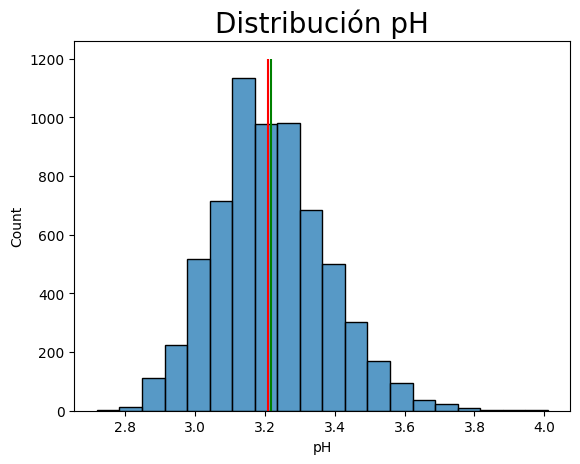

In [5]:
# Le asignamos un titulo al gráfico
plt.title('Distribución pH', fontsize=20)
# Asignamos el histograma
sns.histplot(wines.pH, bins=20)
# Gráficamos en con una linea roja la mediana
plt.vlines(wines.pH.median(), 0, 1200, color='red')
# Gráficamos con 
plt.vlines(wines.pH.mean(), 0, 1200, color='green');

### Density Plot

C:\Users\ezequ\AppData\Local\Temp\ipykernel_18556\1270997775.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wines.pH, bins=15);


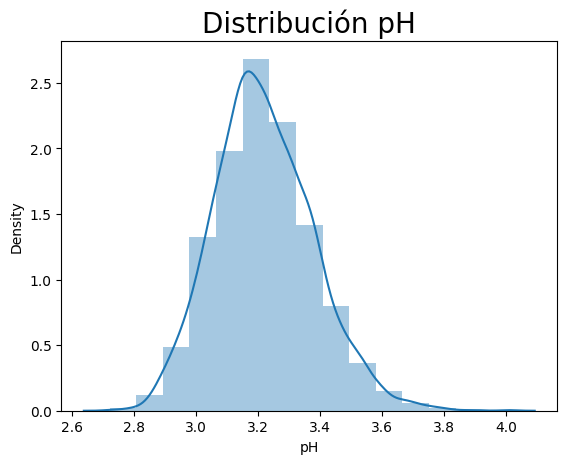

In [6]:
# Le asignamos un titulo al gráfico
plt.title('Distribución pH', fontsize=20)
# Asignamos el histograma
sns.distplot(wines.pH, bins=15);

### Boxplot

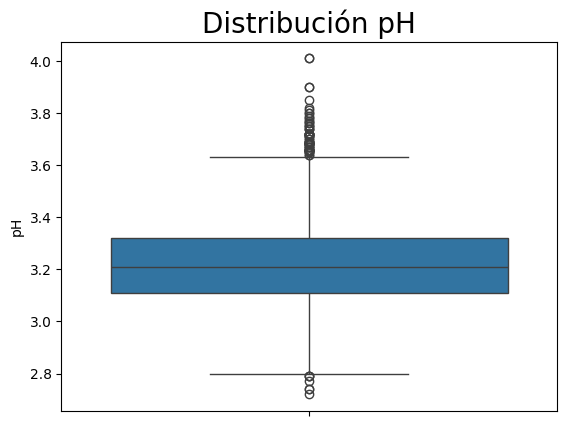

In [7]:
# Le asignamos un titulo al gráfico
plt.title('Distribución pH', fontsize=20)
# Asignamos el histograma
sns.boxplot(wines.pH);

### violinplot

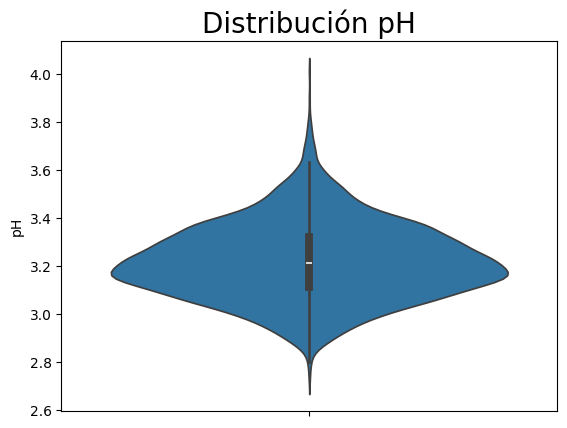

In [8]:
# Le asignamos un titulo al gráfico
plt.title('Distribución pH', fontsize=20)
# Asignamos el histograma
sns.violinplot(wines.pH);

### lineplot

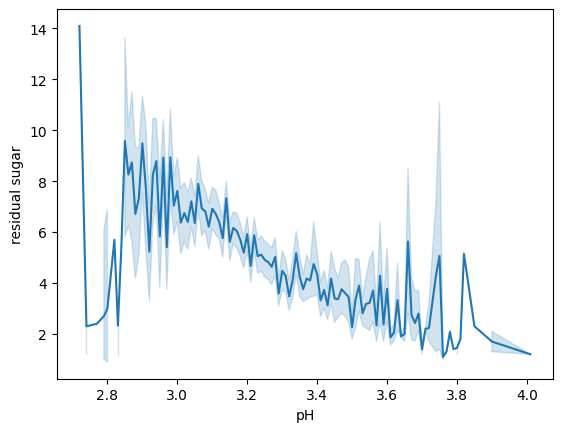

In [9]:
sns.lineplot(x=wines.pH, y=wines['residual sugar']);

### countplot

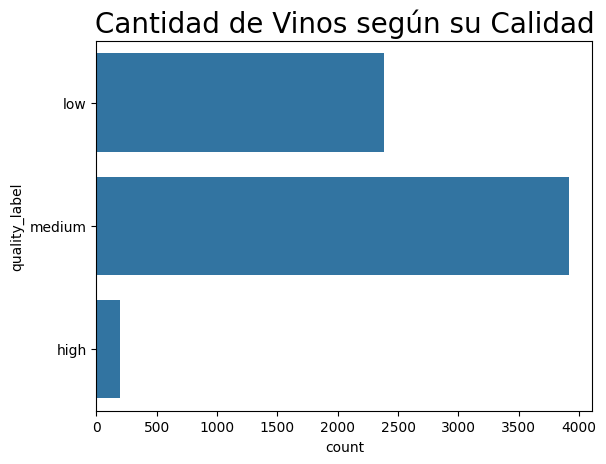

In [10]:
plt.title('Cantidad de Vinos según su Calidad', fontsize=20)
sns.countplot(wines.quality_label);

### piechart

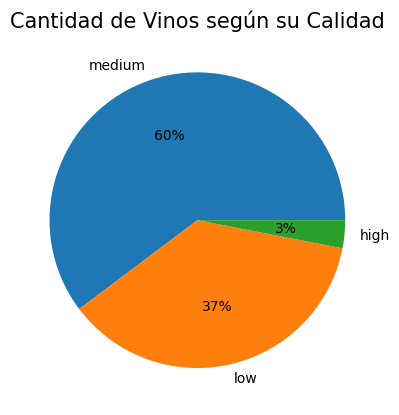

In [11]:
data = list(wines.quality_label.value_counts().values)
keys = list(wines.quality_label.value_counts().index)
plt.title('Cantidad de Vinos según su Calidad', fontsize=15)
plt.pie(data, labels=keys, autopct='%.0f%%');
  


# Análisis Bivariado

### Scatterplot

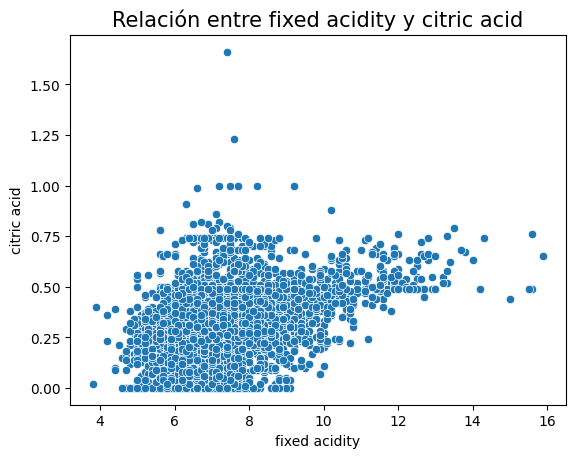

In [12]:
plt.title('Relación entre fixed acidity y citric acid', fontsize=15)
sns.scatterplot(x=wines['fixed acidity'], y=wines['citric acid']);

### barplot

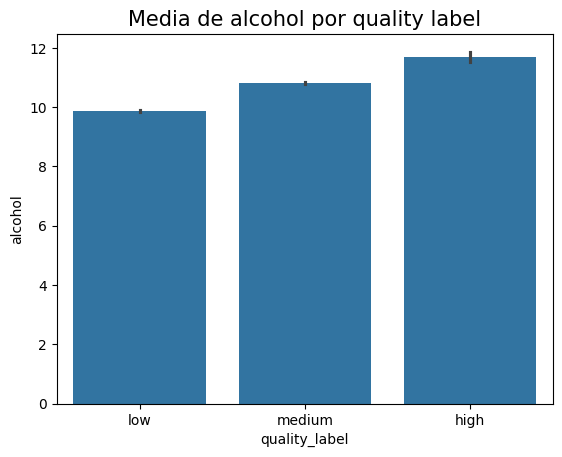

In [13]:
plt.title('Media de alcohol por quality label', fontsize=15)
sns.barplot(x=wines.quality_label, y=wines.alcohol);

### 2D density plot

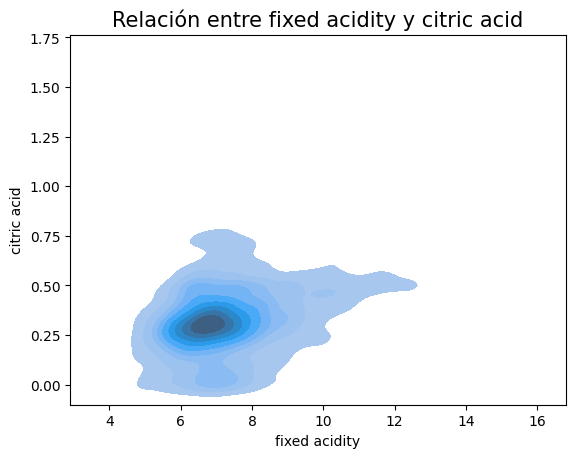

In [14]:
plt.title('Relación entre fixed acidity y citric acid', fontsize=15)
sns.kdeplot(x=wines['fixed acidity'], y=wines['citric acid'],fill=True);

### heatmap

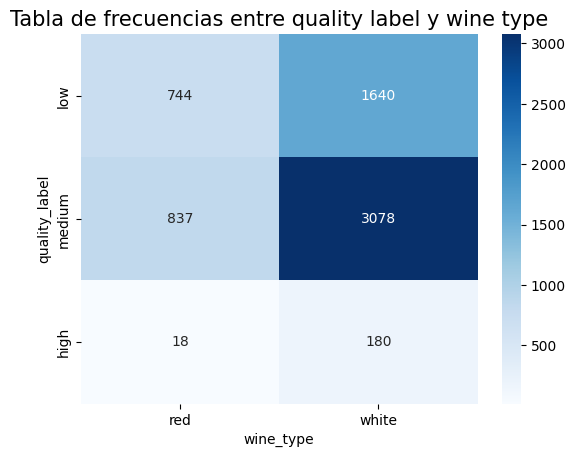

In [15]:
plt.title('Tabla de frecuencias entre quality label y wine type', fontsize=15)
sns.heatmap(pd.crosstab(wines.quality_label, wines.wine_type), annot=True, fmt='g',cmap='Blues',);

### boxplot aperturado por otras variables

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

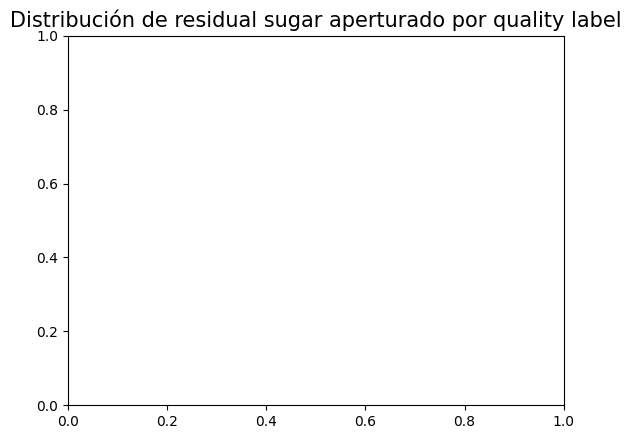

In [16]:
plt.title('Distribución de residual sugar aperturado por quality label', fontsize=15)
sns.boxplot(wines['residual sugar'], wines.quality_label, showfliers=False);

Para más gráficos se adjunta la documentación oficial de seaborn: https://seaborn.pydata.org/index.html